# Generate seurat object


In [11]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import os
import sys
from scipy import sparse



sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
sys.executable

'/home/jovyan/my-conda-envs/sc_analysis/bin/python'

## Load data for samples of interest

In [12]:
path_to_data = '/nfs/team292/lg18/endometriosis/integrated_objects/nuclei_integrated.h5ad'
adata = sc.read(path_to_data)
adata.obs.head()

,n_genes,sample,library,StudyName,SampleID,Lane,Processing,Type,BiopsyType,BiopsyType_II,...,Stage,n_genes_by_counts,total_counts,total_counts_MT,pct_counts_MT,S_score,G2M_score,phase,dataset,Endometrial_pathology
UA_Endo12449300_CTTCAATGTACCGGAA,3302,UA_Endo12449300_EX0045,UA_Endo12449300,Marecckovaa,UA_Endo12449300,43996.0,Frozen,Nuclei,Superficial,NaN,...,Proliferative,3302,6476.0,22.0,0.339716,-0.078014,0.005412,G2M,Mareckova_Nuclei,E
UA_Endo11596521_GAACACTCAGAGAAAG,2282,UA_Endo11596521_FX1236,UA_Endo11596521,Marecckovaa,UA_Endo11596521,43281.0,Frozen,Nuclei,Superficial,NaN,...,Proliferative,2282,4967.0,71.0,1.429434,-0.045719,-0.017081,G1,Mareckova_Nuclei,E + A + P
UA_Endo12865963_TGCGGGTAGGGAGGGT,2786,UA_Endo12865963_FX1087,UA_Endo12865963,Marecckovaa,UA_Endo12865963,44999.0,Frozen,Nuclei,Superficial,NaN,...,Secretory Mid,2786,4926.0,49.0,0.994722,-0.114742,-0.134462,G1,Mareckova_Nuclei,E
UA_Endo12449301_TCAGTGATCGTAGGGA,2071,UA_Endo12449301_FX1150,UA_Endo12449301,Marecckovaa,UA_Endo12449301,43996.0,Frozen,Nuclei,Superficial,NaN,...,Proliferative,2071,3064.0,14.0,0.456919,-0.013804,-0.074582,G1,Mareckova_Nuclei,E
UA_Endo12865960_GAGACTTAGAGATCGC,1890,UA_Endo12865960_FX1170,UA_Endo12865960,Marecckovaa,UA_Endo12865960,44999.0,Frozen,Nuclei,Superficial,NaN,...,Secretory,1890,3010.0,13.0,0.431894,-0.130319,0.046791,G2M,Mareckova_Nuclei,E


/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (11,12,24,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.
... storing 'celltype' as categorical


Doublet                  6023
eM2                      4960
uNK1                     4659
eM1                      2358
uNK1_cycling             2320
uNK2                     1974
T_cell_CD4               1871
cDC2                     1490
T_cell_CD8               1033
uNK3                      870
eM2_cycling               650
Peripheral_lymphocyte     608
Monocyte                  529
B_cell                    465
cDC1                      443
T_Reg                     256
ILC3                      188
pDC                        93
Plasma_B_cell              53
Name: celltype, dtype: int64


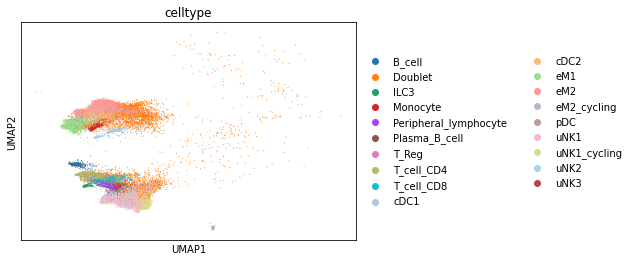

In [13]:
annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/nuclei_endometrium_immune.csv',index_col=0)
annot_df.head()
annot = annot_df['celltype'].to_dict()

adata = adata[ annot_df.index ]
adata.obs['celltype'] = adata.obs_names.map(annot)
print(adata.obs['celltype'].value_counts())
sc.pl.umap(adata, color=['celltype'])

### Exclude unwanted clusters

In [14]:
adata = adata[[ i not in ['Doublet'] for i in adata.obs['celltype'] ]]
adata = adata[[ 'cycling' not in i for i in adata.obs['celltype'] ]]
print(adata.obs['celltype'].value_counts())

eM2                      4960
uNK1                     4659
eM1                      2358
uNK2                     1974
T_cell_CD4               1871
cDC2                     1490
T_cell_CD8               1033
uNK3                      870
Peripheral_lymphocyte     608
Monocyte                  529
B_cell                    465
cDC1                      443
T_Reg                     256
ILC3                      188
pDC                        93
Plasma_B_cell              53
Name: celltype, dtype: int64


### Subset to Ctrl donors in either prolif/secretory phase

In [15]:
adata = adata[[ i in ['Secretory', 'Proliferative'] for i in adata.obs['Binary Stage'] ]]
set(adata.obs['Binary Stage'] )

{'Proliferative', 'Secretory'}

In [16]:
adata = adata[[ i in ['Ctrl_Superficial'] for i in adata.obs['Group'] ]]
set(adata.obs['Group'] )

{'Ctrl_Superficial'}

In [17]:
adata.X.shape

(2952, 33578)

In [18]:
pd.crosstab(adata.obs['Binary Stage'], adata.obs.celltype )

celltype,B_cell,ILC3,Monocyte,Peripheral_lymphocyte,Plasma_B_cell,T_Reg,T_cell_CD4,T_cell_CD8,cDC1,cDC2,eM1,eM2,pDC,uNK1,uNK2,uNK3
Binary Stage,,,,,,,,,,,,,,,,
Proliferative,22,35,67,67,5,20,224,104,46,171,131,426,16,35,87,73
Secretory,7,6,7,11,1,5,16,10,15,69,7,211,0,717,282,59


In [19]:
import pickle   

fileObj = open('/nfs/team292/lg18/endometriosis/integrated_objects/nuclei_immune_integrated_X_scVI.obj', 'rb')
X_scVI = pickle.load(fileObj)
adata.obsm['X_scVI'] = X_scVI
fileObj.close()

fileObj = open('/nfs/team292/lg18/endometriosis/integrated_objects/nuclei_immune_integrated_X_umap.obj', 'rb')
X_umap = pickle.load(fileObj)
adata.obsm['X_umap'] = X_umap
fileObj.close()

# Move to Seurat

In [20]:
import anndata
adataDown = adata.copy() #[[ i in ["G1"] for i in adata_proliferative.obs.phase ]]
sc.pp.filter_cells(adataDown, min_genes=1000)
sc.pp.filter_genes(adataDown, min_cells=5)

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [21]:
import rpy2.rinterface_lib.callbacks
import logging
# Itoliste R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython


In [22]:
# This is just to allow moving adata to R without errors
adataDown.X = adataDown.X.toarray()

idx = ['n_genes', 'sample',  'percent_mito', 'n_counts', 'batch', 'S_score', 'G2M_score', 'phase', 
       'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet']
for i in idx:
    del adataDown.obs[i]
    
adataDown.obs['celltype'] = adataDown.obs['celltype'].astype(str)

# del adataDown.obsm['X_scVI']
# del adataDown.obsm['X_umap']
del adataDown.obsp['connectivities']
del adataDown.obsp['distances']
del adataDown.uns

In [23]:
%%R -i adataDown
adataDown

class: SingleCellExperiment 
dim: 23074 2952 
metadata(0):
assays(1): X
rownames(23074): A1BG A1BG-AS1 ... ZYX ZZEF1
rowData names(165): gene_ids.0 feature_types.0 ... variances_norm
  highly_variable_nbatches
colnames(2952): UA_Endo11173480_AAACGCTCAGTTCCAA
  UA_Endo11173480_AAAGTGAAGGCCATAG ... UA_Endo12604667_TTTCAGTTCCCTTCCC
  UA_Endo12604667_TTTCCTCTCGCAACAT
colData names(42): library StudyName ... Endometrial_pathology celltype
reducedDimNames(2): X_scVI UMAP
altExpNames(0):


In [24]:
%%R

library(Seurat)
seurat_andata = as.Seurat(adataDown, counts = "X", data = "X")
Idents(seurat_andata) = seurat_andata$celltype

saveRDS(seurat_andata, "/nfs/team292/lg18/endometriosis/MiloR_objects/nuclei_immune_integrated.rds")

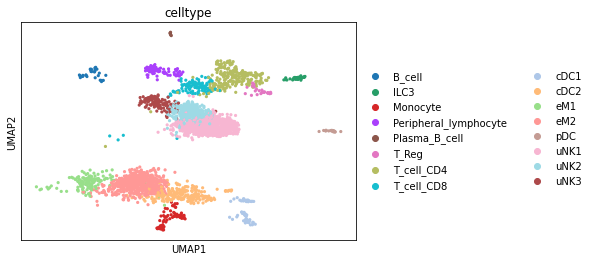

In [25]:
sc.pl.umap(adata, color=['celltype'])